<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(45)

In [2]:
x1 = np.array([0, 0, 1, 0, 1, 1, 0])
x2 = np.array([0, 1, 0, 1, 0, 1, 0])
x3 = np.array([1, 1, 1, 0, 0, 1, 0])
y = np.array([[0], [1], [1], [1], [1], [0], [0]])
X = np.vstack([x1, x2, x3]).T
print(X.shape, y.shape)

(7, 3) (7, 1)


In [3]:
##### Your Code Here #####
class TwoLayerNetSimple(object):
    """
    Simple two fully connected layers net with simple loss function loss = y - y_pred
    """
    def __init__(self, input_dim = 3, hidden_dim = 100, output_dim = 1, iterations=10000):
        self.iterations = iterations

        # initiailize weights
        self.W1 = np.random.rand(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros(hidden_dim)
        self.W2 = np.random.rand(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros(output_dim)
        self.loss = []
        pass
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def affine_forward(self, x, w, b):
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    def affine_backward(self, dout, cache):
        x, w, b = cache
        dx = dout.dot(w.T)#.reshape(x.shape)
        dw = x.T.dot(dout)
        db = np.sum(dout, axis=0)
        return dx, dw, db
        
    def fit(self, x, y):
        for i in range(self.iterations):            
            # forward prop
            a1, cache_l1 = self.affine_forward(x, self.W1, self.b1)
            out_l1 = self.sigmoid(a1)
            a2, cache_l2 = self.affine_forward(out_l1, self.W2, self.b2)

            # scoring
            out_l2 = self.sigmoid(a2)
            loss = y - out_l2
            self.loss.append(np.sqrt(np.sum(loss**2)))

            # back prop
            da2 = loss * self.dsigmoid(out_l2)
            dout_l2, dW2, db2 = self.affine_backward(da2, cache_l2)
            da1 = dout_l2 * self.dsigmoid(out_l1)
            _, dW1, db1 = self.affine_backward(da1, cache_l1)

            # gradient update
            self.W1 += dW1
            self.b1 += db1
            self.W2 += dW2
            self.b2 += db2
        pass
        
    def predict(self, x):
        x = np.array(x)
        a1, _ = self.affine_forward(x.reshape(1, -1), self.W1, self.b1)
        out1 = self.sigmoid(a1)
        scores = self.affine_forward(out1, self.W2, self.b2)
        out = self.sigmoid(scores[0])
        return out

In [4]:
nn = TwoLayerNetSimple(input_dim=3, hidden_dim=100, output_dim=1, iterations=10000)
nn.fit(X, y)

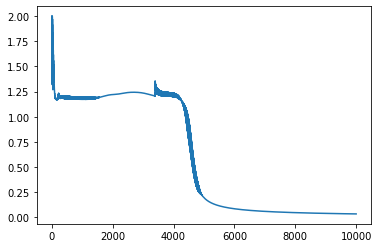

In [5]:
plt.plot(np.array(nn.loss));

In [6]:
test1, test2, test3, test4, test5, test6, test7 = X[0], X[1], X[2], X[3], X[4], X[5], X[6]
print(f"{test1}, {nn.predict(test1)}, {y[0]}")
print(f"{test2}, {nn.predict(test2)}, {y[1]}")
print(f"{test3}, {nn.predict(test3)}, {y[2]}")
print(f"{test4}, {nn.predict(test4)}, {y[3]}")
print(f"{test5}, {nn.predict(test5)}, {y[4]}")
print(f"{test6}, {nn.predict(test6)}, {y[5]}")
print(f"{test7}, {nn.predict(test7)}, {y[6]}")

[0 0 1], [[6.66037658e-09]], [0]
[0 1 1], [[0.99753136]], [1]
[1 0 1], [[0.98363523]], [1]
[0 1 0], [[0.9834246]], [1]
[1 0 0], [[0.99762126]], [1]
[1 1 1], [[0.01492947]], [0]
[0 0 0], [[0.0147206]], [0]


# Implementation without biases

In [7]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 3
        self.hiddenNodes = 3
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN infernece using feed forward.
        aka "predict"
        """
        # weighted sum of inputs => hidden layer
        self.hidden_sum = X.dot(self.weights1)
        # activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        #weighted sum between hidden and output
        self.output_sum = self.activated_hidden.dot(self.weights2)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, loss, y, y_pred):
        # error in output
        self.o_error = y - y_pred
        
        # apply derivative of sigmoid to error
        # how far off are we in relation to the sigmoid f(x) of the output
        self.o_delta = self.o_error * self.sigmoidPrime(y_pred)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        # how much of that 'far off' can be explained by the hidden -> output weights
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
#         # z1 error
#         self.z1_error = self.z2_delta.dot(self.X.T)
        
        self.weights1 += X.T.dot(self.z2_delta)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [8]:
nn = NeuralNetwork()

# Number of Epochs/Iterations
for i in range(1000):
   if (i+1 in [1,2,3,4,5]) or ((i+1) % 100 ==0):
       print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
       # print('Input: \n', X)
       # print('Actual Output: \n', y)
       # print('Predicted Output: \n', str(nn.feed_forward(X)))
       print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
   nn.train(X, y)

+---------EPOCH 1---------+
Loss: 
 0.24667342000908388
+---------EPOCH 2---------+
Loss: 
 0.24330853172275063
+---------EPOCH 3---------+
Loss: 
 0.242119623157949
+---------EPOCH 4---------+
Loss: 
 0.2416639657831719
+---------EPOCH 5---------+
Loss: 
 0.24141754708998345
+---------EPOCH 100---------+
Loss: 
 0.1596334835585045
+---------EPOCH 200---------+
Loss: 
 0.10241588729490761
+---------EPOCH 300---------+
Loss: 
 0.06299721923481134
+---------EPOCH 400---------+
Loss: 
 0.03783509731206431
+---------EPOCH 500---------+
Loss: 
 0.010566471280767408
+---------EPOCH 600---------+
Loss: 
 0.006238041512691672
+---------EPOCH 700---------+
Loss: 
 0.004607993694518714
+---------EPOCH 800---------+
Loss: 
 0.0037149162045489064
+---------EPOCH 900---------+
Loss: 
 0.0031375532872161558
+---------EPOCH 1000---------+
Loss: 
 0.002728135277071776


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [9]:
##### Your Code Here #####

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

In [10]:
# one-hot encoding
num_classes = 10
targets = y_train.reshape(-1)
y_oh_train = np.eye(num_classes)[targets]


# size = y.shape[0]
# y = y.reshape(1, examples)
# Y_new = np.eye(digits)[y.astype('int32')]
# Y_new = Y_new.T.reshape(num_classes, size)

In [11]:
x_train.shape, y_oh_train.shape

((60000, 784), (60000, 10))

In [12]:
class TwoLayerNet(object):
    def __init__(self, input_dim = 28*28, hidden_dim = 100, output_dim = 10, iterations=21):
        self.iterations = iterations

        # initiailize weights
        self.W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.b1 = np.zeros(hidden_dim)
        self.W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.b2 = np.zeros(output_dim)
        self.loss = []
        pass

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def dsigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def cross_entropy_loss(self, y, y_pred):
        loss = np.sum(np.multiply(y, np.log(y_pred)))
        m = y.shape[1]
        loss = -(1./m) *loss
        return loss
    
    def forward(self, x):        
        # first fully connected layer with sigmoid activation
        a1 = x.dot(self.W1) + self.b1
        out_l1 = self.sigmoid(a1)
        
        # second fully connected layer with softmax activation
        # https://nolanbconaway.github.io/blog/2017/softmax-numpy
        a2 = out_l1.dot(self.W2) + self.b2
        out_l2 = np.exp(a2) / np.sum(np.exp(a2), axis=0)

        return (out_l2, a2, out_l1, a1)

    def backward(self, x, y, cache):
        out_l2, a2, out_l1, a1 = cache
        
        loss = y - out_l2
        # backprop loss through softmax and then layer2 
        dout_l2 = loss * np.exp(loss) / np.sum(np.exp(a2), axis=0)
        dW2 = out_l1.T.dot(dout_l2)
        db2 = np.sum(dout_l2, axis=0)
        da2 = dout_l2.dot(self.W2.T)
        
        # backprop loss through sigmoid and then layer 1
        dout_l1 = da2 * self.dsigmoid(out_l1)
        dW1 = x.T.dot(dout_l1)
        db1 = np.sum(dout_l1, axis=0)
        return dW2, db2, dW1, db1
        
    def fit(self, x, y):
        for i in range(self.iterations):
            # forward pass
            cache = self.forward(x)
            out_l2, a2, out_l1, a1 = cache

            loss = y - out_l2
            self.loss.append(self.cross_entropy_loss(y, out_l2))

            # backward pass
            dW2, db2, dW1, db1 = self.backward(x, y, cache)
            
            # gradient update
            self.W1 += dW1 * (1/1000)
            self.b1 += db1 * (1/1000)
            self.W2 += dW2 * (1/1000)
            self.b2 += db2 * (1/1000)

            if i % 100 == 0:
                print(f'(Iteration {i+1}) loss: {self.loss[-1]}')
        pass
        
    def predict(self, x):
        out, _, _, _ = self.forward(x)
        return out

In [13]:
model = TwoLayerNet(input_dim=28*28, hidden_dim=1000, output_dim=10, iterations=1000)

In [14]:
model.fit(x_train[:100], y_oh_train[:100])

(Iteration 1) loss: 46.18529636299745
(Iteration 101) loss: 45.982586277232635
(Iteration 201) loss: 45.927752279854474
(Iteration 301) loss: 45.894699758122485
(Iteration 401) loss: 45.87100963604202
(Iteration 501) loss: 45.85255534199584
(Iteration 601) loss: 45.83744956513804
(Iteration 701) loss: 45.82467010201088
(Iteration 801) loss: 45.813600756551956
(Iteration 901) loss: 45.80384136150909


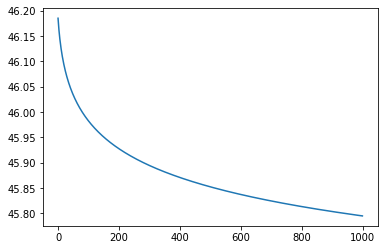

In [15]:
plt.plot(np.array(model.loss));

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?